# 유통고객 구매패턴 데이터 전처리
## 단계1. 데이터 탐색 및 준비

## 0.미션

### (1) 미션① : 비즈니스 정보 파악
* 예제 질문 9개 조회를 수행해냅니다.


### (2) 미션 ② : 데이터 구조 만들기

* 고객 이탈을 정의하고, 데이터를 생성합니다.
    * 대상 고객
        * 2014 ~ 2016년 신규 가입 고객 이면서,
        * 2016년 하반기에 한번 이상 방문한 고객을 대상 고객으로 정의합니다.
    * Labeling
        * 위 대상 고객 중, 2017년 1~3월(3개월)동안 방문(구매)하지 않은 사람은 이탈로 간주합니다.
    * feature 추가하기
        * 주어진 기본 feature 3가지를 생성합니다.

## 1.환경설정

### (1) 라이브러리 설치하기
아래를 실행해주세요.

In [312]:
!pip install matplotlib
!pip install --upgrade matplotlib

import matplotlib.pyplot as plt

### (2) 라이브러리 불러오기

* 세부 요구사항
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [313]:
#[문제1] pandas, numpy, matplotlib 라이브러리를 임포트하세요.

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### (3) 데이터 불러오기

* 주어진 데이터셋
    * customers.csv : 고객정보
    * sales.csv : 판매정보
    * products.csv : 상품정보
    
* 다음과 같이 데이터를 저장하세요.
    * 주피터랩 실행
        * 제공된 압축파일 '미프 1차_구매'를 다운받아 압축을 푼다.
        * anaconda의 root directory(보통 C:\Users\<ID> 에 '미프 1차_구매' 폴더를 만들고, 복사하고 붙여넣습니다.
        * '미프 1차_구매' 폴더에 필요한 파일들을 넣고, 본 파일 '데이터 전처리_교육생용' 실습파일을 불러옵니다

* 세부 요구사항
    - 데이터셋을 각각 불러와서 데이터프레임으로 저장합니다.
    - 날짜 데이터들은 날짜형식으로 변환합니다. (customers['RegisterDate'], sales['OrderDate'])
    - 기본 정보를 확인합니다.(.shape, .info(), .head())

In [315]:
#[문제2] '미프 1차_구매' 폴더에서 본 파일들을 열어주세요.

In [316]:
# 전체 데이터 불러오기

# 데이터 3개를 pd.read_csv로 불러오기
customers = pd.read_csv('customers.csv')
sales = pd.read_csv('sales.csv')
products = pd.read_csv('products.csv')

In [317]:
#[문제3] 'customers', 'sales' 데이터의 상단 일부 행을 출력해보세요.

In [318]:
#customers
customers.head()

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2
0,c328222,2014-09-25,F,1960,강원도,원주시
1,c281448,2013-06-18,F,1974,강원도,원주시
2,c038336,2003-10-10,F,1968,강원도,춘천시
3,c084237,2007-03-09,F,1982,강원도,강릉시
4,c162600,2010-06-14,F,1978,강원도,속초시


In [319]:
#sales
sales.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,107,2,2016-01-02,p1036481,2,2100,c150417
1,69,1,2016-01-02,p1152861,1,1091,c212716
2,69,7,2016-01-02,p1013161,1,2600,c212716
3,69,8,2016-01-02,p1005771,1,1650,c212716
4,69,11,2016-01-02,p1089531,1,2600,c212716


### [문제4] 'customers'와 'sales' 데이터프레임의 구조와 기본 통계정보를 출력해보세요.

In [320]:
#customers
customers.describe()

,BirthYear
count,2243.000000
mean,1971.107445
std,9.658465
min,1932.000000
25%,1966.000000
50%,1972.000000
75%,1978.000000
max,1999.000000


In [321]:
#sales
sales.describe()

,OrderID,Seq,Qty,Amt
count,70012.000000,70012.000000,70012.000000,70012.000000
mean,101.857996,4.892233,1.238588,2785.229218
std,62.229614,4.255965,1.419127,2734.617603
min,3.000000,1.000000,-44.000000,-67650.000000
25%,49.000000,2.000000,1.000000,1300.000000
50%,95.000000,4.000000,1.000000,1950.000000
75%,145.000000,7.000000,1.000000,3227.000000
max,385.000000,40.000000,200.000000,109100.000000


### [문제5] 날짜 데이터를 날짜형식으로 변환해주세요. 날짜데이터 : customers['RegisterDate'], sales['OrderDate']

In [322]:
# pd.to_datetime 활용
customers['RegisterDate'] = pd.to_datetime(customers['RegisterDate'])
sales['OrderDate'] = pd.to_datetime(sales['OrderDate'])

### [문제6] 'customers'의 데이터타입이 날짜형식으로 잘 변환되었는지 확인해주세요.

In [323]:
customers.dtypes

CustomerID              object
RegisterDate    datetime64[ns]
Gender                  object
BirthYear                int64
Addr1                   object
Addr2                   object
dtype: object

### [문제7] 'sales'의 데이터타입이 날짜형식으로 변환되었는지 확인해주세요.

In [324]:
sales.dtypes

OrderID                int64
Seq                    int64
OrderDate     datetime64[ns]
ProductID             object
Qty                    int64
Amt                    int64
CustomerID            object
dtype: object

## [문제8] 'sales' 데이터의 'OrderDate'의 최소값과 최대값을 표시해주세요.

In [325]:
# min, max 함수 활용
print(f"sales 데이터의 최소값 : {sales['OrderDate'].min()} \nsales 데이터의 최대값 : {sales['OrderDate'].max()}") 

sales 데이터의 최소값 : 2016-01-02 00:00:00 
sales 데이터의 최대값 : 2017-03-31 00:00:00


## 2.데이터 탐색

주어진 데이터에 대해서 다음의 요건에 맞게 조회하면서 데이터를 파악해 봅시다.

* **상세요구사항**
    * 아래 예제 질문 9개에 대해 조회를 수행합니다.
    * 예제 질문
        * Q01) 일별 매출액
        * Q02) 월별 매출액
        * Q03) 요일별 매출액 평균
        * Q04) 일별 고객 1인당 평균 구매액(객단가)
        * Q05) 일별 방문 고객수(구매 고객수)
        * Q06) 매출 상위 top 10 상품
        * Q07) 요일별 매출상위 Top 10 상품
        * Q08) 카테고리별 매출 비중
        * Q09) 고객 나이대

### Q01) 일별 매출액

### [문제9] 'sales' 데이터프레임에서 일별 매출액의 합계를 'daily_sales' 데이터 프레임에 할당하세요.

In [326]:
# 'sales'에서 주문일자별 주문 금액 합산 : groupby
daily_sales = sales.groupby('OrderDate',as_index = False)['Amt'].sum()
daily_sales.head(5)

,OrderDate,Amt
0,2016-01-02,503234
1,2016-01-03,211202
2,2016-01-04,705195
3,2016-01-05,502803
4,2016-01-06,485984


### [문제10] 'sales' 데이터프레임에서 부분인 2016년 1월~3월까지 3개월의 범위로 데이터를 선택하고 'daily_sales'에 할당하세요.

In [327]:
# sales['OrderDate'] 상태 확인
sales['OrderDate'].head()

0   2016-01-02
1   2016-01-02
2   2016-01-02
3   2016-01-02
4   2016-01-02
Name: OrderDate, dtype: datetime64[ns]

In [328]:
# loc 함수 활용 
# daily_sales에는 2016년 1월~3월까지 3개월의 범위가 할당된 상태
daily_sales = sales.loc[ (sales['OrderDate'] >='2016-01-01')  & 
                       (sales['OrderDate']<='2016-03-31') ]

daily_sales = sales.loc[ (sales['OrderDate'] <'2016-04-01') ]
daily_sales.tail(10)

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
14064,47,1,2016-03-31,p1072601,1,4600,c068423
14065,47,2,2016-03-31,p1002841,1,11000,c068423
14066,59,2,2016-03-31,p1256521,1,1850,c343446
14067,61,1,2016-03-31,p1002841,1,11000,c093685
14068,63,1,2016-03-31,p1005891,2,3900,c304973
14069,63,2,2016-03-31,p1175481,1,1300,c304973
14070,67,1,2016-03-31,p1178011,1,8800,c115575
14071,67,2,2016-03-31,p1162631,1,4600,c115575
14072,67,3,2016-03-31,p1002841,1,11000,c115575
14073,71,1,2016-03-31,p1178011,1,8800,c222420


### [문제11] 일자별 매출액을 'daily_sales' 데이터 프레임에 저장해주세요.


In [329]:
#'OrderDate' 기준 'Amt'의 합계 계산

In [330]:
# daily_sales 데이터에는 일자 기준으로 Amt을 합친 상태

daily_sales = daily_sales.groupby(by='OrderDate', as_index=False)[['Amt']].sum().head()

### [문제12] 'daily_sales' 데이터를 확인해보세요.

In [331]:
daily_sales.head()

,OrderDate,Amt
0,2016-01-02,503234
1,2016-01-03,211202
2,2016-01-04,705195
3,2016-01-05,502803
4,2016-01-06,485984


### Q02) 월별 매출액

### [문제13] 기간별 조회를 위해 'sales' 데이터프레임에 주문일자의 연도와 월의 변수를 추가해주세요.

In [332]:
# 연도는 'Year', 월은 'Month'로 변수를 추가
# 'OrderDate' 컬럼에서 dt.year, dt.month 함수 활용

In [333]:
import datetime as dt

# Year 데이터에 sales 데이터의 주문일자의 연도값을 할당
Year = pd.DataFrame({'datetime':sales['OrderDate']}).datetime.dt.year
print(Year.head())

# Month 데이터에 sales 데이터의 주문일자의 월값을 할당
Month = pd.DataFrame({'datetime':sales['OrderDate']}).datetime.dt.month
Month.head
# sales['Year'] = sales.datetime.dt.year
# daily_sales['OrderDate'].year

0    2016
1    2016
2    2016
3    2016
4    2016
Name: datetime, dtype: int64


<bound method NDFrame.head of 0        1
1        1
2        1
3        1
4        1
        ..
70007    3
70008    3
70009    3
70010    3
70011    3
Name: datetime, Length: 70012, dtype: int64>

In [334]:
# sales 데이터 프레임에 'Year' 열과 'Month' 열 추가
sales['Year'] = Year
sales['Month'] = Month
sales.head(5)
sales.tail(5)

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month
70007,53,4,2017-03-31,p1072601,1,4600,c337999,2017,3
70008,53,6,2017-03-31,p1178011,1,8800,c337999,2017,3
70009,55,6,2017-03-31,p1054261,1,2091,c088320,2017,3
70010,59,4,2017-03-31,p1175481,1,1300,c238056,2017,3
70011,59,5,2017-03-31,p1013161,1,2950,c238056,2017,3


### [문제14] 월별 매출액의 합계를 구하고 'monthly_sales'에 저장해주세요.

In [335]:
# groupby 함수 활용, as_index = False
# month_sales에 월별 매출액의 합계 할당
# month_sales = sales.groupby(by=['Year','Month'], as_index=False)[['Amt']].sum()

month_sales = sales.groupby(by=['Year','Month'], as_index=False)[['Amt']].sum()
# month_sales = sales.groupby(by=['Month'], as_index=False)[['Amt']].sum()

### [문제15] 'monthly_sales'를 출력하고 확인해주세요.

In [336]:
# 월별 매출액 데이터 프레임의 위, 아래 값 확인
month_sales.head()
month_sales.tail()

,Year,Month,Amt
10,2016,11,9767765
11,2016,12,13061191
12,2017,1,14721755
13,2017,2,12559903
14,2017,3,15585079


### Q03) 요일별 매출액 평균

### [문제16] 'sales' 데이터프레임에서 주문일자 기준 일별 매출액의 합계를 구해 'day_sales'에 저장하세요.

In [337]:
# groupby 함수 활용, 'OrderDate' 기준 'Amt'의 합산
# sum 함수 활용

In [338]:
# 일자별 매출액의 합계 'Amt' 를 계산하여 day_sales에 할당
day_sales = sales.groupby('OrderDate', as_index= False)['Amt'].sum()

In [339]:
day_sales.head()

,OrderDate,Amt
0,2016-01-02,503234
1,2016-01-03,211202
2,2016-01-04,705195
3,2016-01-05,502803
4,2016-01-06,485984


### [문제17] 'day_sales'에서 'OrderDate' 열의 날짜 정보를 활용하여 'Weekday' 열을 추가하세요.

### dt.day_name() 함수 

In [340]:
# day_sales의 OrderDate에서 날짜 정보를 Weekday를 통해 불러온다.
Weekday = pd.DataFrame({'datetime':sales['OrderDate']}).datetime.dt.day_name()
Weekday

0        Saturday
1        Saturday
2        Saturday
3        Saturday
4        Saturday
           ...   
70007      Friday
70008      Friday
70009      Friday
70010      Friday
70011      Friday
Name: datetime, Length: 70012, dtype: object

### [문제18] day_sales 데이터프레임의 'Weekday' 열을 출력하세요.
- 월요일 = 0

In [341]:
# day_sales 데이터 프레임에 Weekday 열을 추가
day_sales['Weekday'] = Weekday

In [342]:
# day_sales 프레임에 잘 할당되었는지 확인
day_sales.head()

,OrderDate,Amt,Weekday
0,2016-01-02,503234,Saturday
1,2016-01-03,211202,Saturday
2,2016-01-04,705195,Saturday
3,2016-01-05,502803,Saturday
4,2016-01-06,485984,Saturday


### Q04) 일별 고객 1인당 평균 구매액(객단가)

### [문제19] 'sales' 데이터프레임에서 주문일자,고객ID별 주문금액을 합산하여 'order_amt'에 저장하세요.

In [343]:
# 'OrderDate'와 'CustomerID' 기준 groupby 함수 활용
# sum 함수 활용

In [344]:
# sales에 데이터가 잘 들어있는 지 확인
sales.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month
0,107,2,2016-01-02,p1036481,2,2100,c150417,2016,1
1,69,1,2016-01-02,p1152861,1,1091,c212716,2016,1
2,69,7,2016-01-02,p1013161,1,2600,c212716,2016,1
3,69,8,2016-01-02,p1005771,1,1650,c212716,2016,1
4,69,11,2016-01-02,p1089531,1,2600,c212716,2016,1


In [345]:
# 주문일자, 고객 ID별 주문금액 Amt를 합산하여 order_amt에 할당
order_amt = sales.groupby(by=['OrderDate','CustomerID'],as_index=False)[['Amt']].sum()

In [346]:
order_amt

,OrderDate,CustomerID,Amt
0,2016-01-02,c029643,2650
1,2016-01-02,c047907,1650
2,2016-01-02,c068640,3300
3,2016-01-02,c082866,12350
4,2016-01-02,c083862,9504
...,...,...,...
32649,2017-03-31,c385994,10700
32650,2017-03-31,c394131,4150
32651,2017-03-31,c397789,4250
32652,2017-03-31,c399578,10700


### [문제20] 'order_amt'의 상단 10행을 출력하세요.

In [347]:
# order_amt 사단 출력해서 확인
# head 함수
order_amt.head().head(10)

,OrderDate,CustomerID,Amt
0,2016-01-02,c029643,2650
1,2016-01-02,c047907,1650
2,2016-01-02,c068640,3300
3,2016-01-02,c082866,12350
4,2016-01-02,c083862,9504


### [문제21] 'order_amt'에서 주문일자별 고객 구매액의 총 평균을 구하고 'order_amt2'에 저장하세요.

In [348]:
# 'OrderDate'기준 groupby 함수 활용
# mean 함수 활용

In [349]:
# 주문 일자 OrderDate를 기준으로 고객 구매액 Amt 의 총 평균 계산하여 order_amt2에 계산
order_amt2 = order_amt.groupby(by=['OrderDate'],as_index=False)[['Amt']].mean()

In [350]:
order_amt2.head()

,OrderDate,Amt
0,2016-01-02,7624.757576
1,2016-01-03,5415.435897
2,2016-01-04,6716.142857
3,2016-01-05,6364.594937
4,2016-01-06,6844.845070


### Q05) 일별 방문 고객수(구매 고객수)

### [문제22] 'order_amt'에서 일별 방문 고객수를 구하고 'daily_visit'으로 저장해주세요.


In [351]:
# CustomerID 컬럼의 데이터 개수 계산
# daily_visit에 일별 OrderDate 별로 방문 고객수를 CustomerID의 count를 통해 할당
daily_visit = order_amt.groupby(by='OrderDate', as_index = False)[['CustomerID']].count()

In [352]:
daily_visit.head()

,OrderDate,CustomerID
0,2016-01-02,66
1,2016-01-03,39
2,2016-01-04,105
3,2016-01-05,79
4,2016-01-06,71


### [문제23] 'order_amt2'에 'daily_visit' 컬럼을 주문일자 기준 추가해주세요.

In [353]:
# order_amt2 확인 먼저 하자!!
order_amt2.head(10)

,OrderDate,Amt
0,2016-01-02,7624.757576
1,2016-01-03,5415.435897
2,2016-01-04,6716.142857
3,2016-01-05,6364.594937
4,2016-01-06,6844.845070
5,2016-01-07,5542.943662
6,2016-01-08,5970.554217
7,2016-01-09,8382.814286
8,2016-01-10,8611.017241
9,2016-01-11,7268.670732


In [354]:
# order_amt2에 daily_vist 컬럼을 주문일자 OrderDate를 기준으로 추가
order_amt2 = pd.merge(order_amt2, daily_visit, on = 'OrderDate', how='outer')

### [문제24] 'order_amt2' 데이터를 확인해보세요.

In [355]:
order_amt2.head()

,OrderDate,Amt,CustomerID
0,2016-01-02,7624.757576,66
1,2016-01-03,5415.435897,39
2,2016-01-04,6716.142857,105
3,2016-01-05,6364.594937,79
4,2016-01-06,6844.845070,71


### Q06) 매출 상위 top 10 상품

### [문제25] 'sales' 데이터와 'products' 데이터를 합쳐서 'top_amt'에 할당하세요.

In [356]:
# merge 함수 활용
# sales 데이터와 products 데이터 merge의 inner를 통해서 top_amt에 할당
top_amt = pd.merge(sales, products,how='outer')

In [357]:
# merge 전, sales 데이터의 상태 확인
sales.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month
0,107,2,2016-01-02,p1036481,2,2100,c150417,2016,1
1,69,1,2016-01-02,p1152861,1,1091,c212716,2016,1
2,69,7,2016-01-02,p1013161,1,2600,c212716,2016,1
3,69,8,2016-01-02,p1005771,1,1650,c212716,2016,1
4,69,11,2016-01-02,p1089531,1,2600,c212716,2016,1


In [358]:
# merge 전, products 데이터의 상태 확인
products.head()

,ProductID,ProductName,Category,SubCategory
0,p1052661,새우깡,간식,과자
1,p1054261,고구마스틱,간식,과자
2,p1097821,짱구,간식,과자
3,p1097831,감자칩,간식,과자
4,p1119071,뿌셔뿌셔,간식,과자


In [359]:
# top_amt에 잘 할당되었는 지 확인
top_amt.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month,ProductName,Category,SubCategory
0,107,2,2016-01-02,p1036481,2,2100,c150417,2016,1,순두부,반찬류,두부
1,137,4,2016-01-02,p1036481,2,2100,c280590,2016,1,순두부,반찬류,두부
2,63,16,2016-01-03,p1036481,1,1050,c037915,2016,1,순두부,반찬류,두부
3,135,3,2016-01-04,p1036481,3,3150,c100815,2016,1,순두부,반찬류,두부
4,63,13,2016-01-06,p1036481,10,10500,c048405,2016,1,순두부,반찬류,두부


### [문제26] 상품명을 기준으로 매출 합계를 구하여 'top_amt2'에 저장하세요

In [360]:
# groupby 함수 활용, sum함수 활용
# 상품명 ProductName을 기준으로 top_amt2에 할당
top_amt2 = top_amt.groupby(by='ProductName', as_index= False)[['Amt']].sum()

In [361]:
top_amt2.head(10)

,ProductName,Amt
0,감귤컵푸딩,677154
1,감자칩,3676518
2,고구마스틱,1620986
3,깻잎,2930359
4,낱개캔디,479197
5,느타리버섯,4163035
6,당근,4453387
7,두부_대,10119037
8,두부_소,7319963
9,딸기_대,11011541


### [문제27] 'top_amt2' 데이터프레임을 'Amt'열 기준 상위 10개의 데이터를 선택하여 내림차순으로 정렬하고 'top10_amt'에 저장하세요.

In [362]:
# sort_values 함수 활용

In [363]:
# sort_values를 통해 top_amt2 데이터 프레임을 Amt 열 기준 상위 10개의 데이터를 선택하여 내림차순, top10_amt에 할당
top10_amt = top_amt2.sort_values(by='Amt', ascending=False).head(10)

### [문제28] 'top10_amt' 데이터프레임을 확인하세요.

In [364]:
# top10_amt에 잘 할당되었는 지 확인
top10_amt.head(10)

,ProductName,Amt
37,우유1000,18129067
23,사과_소,14078818
9,딸기_대,11011541
7,두부_대,10119037
10,딸기_소,7517664
8,두부_소,7319963
49,콩나물,6971347
39,유기농우유,6437323
50,토마토,6291001
43,참외,5491030


### Q07) 카테고리별 매출 비중

### [문제29] 'sales'와 'products' 데이터프레임을 합치고 'cate_amt'에 저장하세요.

In [365]:
# merge 함수
cate_amt = pd.merge(sales, products)

In [366]:
# 50개를 확인해본 결과 여기에서는 결측치가 없다.
cate_amt.head(50)

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month,ProductName,Category,SubCategory
0,107,2,2016-01-02,p1036481,2,2100,c150417,2016,1,순두부,반찬류,두부
1,137,4,2016-01-02,p1036481,2,2100,c280590,2016,1,순두부,반찬류,두부
2,63,16,2016-01-03,p1036481,1,1050,c037915,2016,1,순두부,반찬류,두부
3,135,3,2016-01-04,p1036481,3,3150,c100815,2016,1,순두부,반찬류,두부
4,63,13,2016-01-06,p1036481,10,10500,c048405,2016,1,순두부,반찬류,두부
5,75,4,2016-01-06,p1036481,1,1050,c088439,2016,1,순두부,반찬류,두부
6,73,6,2016-01-06,p1036481,1,1050,c254571,2016,1,순두부,반찬류,두부
7,109,3,2016-01-08,p1036481,1,1050,c193651,2016,1,순두부,반찬류,두부
8,27,9,2016-01-11,p1036481,1,1050,c227351,2016,1,순두부,반찬류,두부
9,87,11,2016-01-11,p1036481,1,1050,c296737,2016,1,순두부,반찬류,두부


### [문제30] 카테고리를 기준으로 매출 합계를 구하여 'cate_amt2'에 저장하세요.

In [367]:
# groupby, sum 함수 활용

In [368]:
# 카테고리 Category 기준으로 매출 Amt 합계를 cate_amt2에 할당
cate_amt2 = cate_amt.groupby(by='Category', as_index=False)[['Amt']].sum()

In [369]:
cate_amt2.head(10)

,Category,Amt
0,간식,12920570
1,과일,49789339
2,반찬류,32204820
3,유제품,45261956
4,채소,54822783


### [문제31] 카테고리별 매출 비중을 구하여 'Rate' 변수를 'cate_amt2'에 추가해주세요. 

In [370]:
# 매출 비중 : 'Amt' / Amt.sum()
cate_amt2 = cate_amt.groupby(by='Category', as_index=False)[['Amt']].sum()
# 카테고리별로 매출액의 합계가 잘 할당되었는 지 확인
cate_amt.groupby(by='Category', as_index=False)[['Amt']].sum()

,Category,Amt
0,간식,12920570
1,과일,49789339
2,반찬류,32204820
3,유제품,45261956
4,채소,54822783


In [371]:
# 매출액의 합계
cate_amt2['Amt'].sum()
# cata_amt2 Rate 열에 매출액의 합계 cate_amt2['Amt'].sum()으로 Amt 열을 나눠 비중을 구한다.
cate_amt2['Rate'] = cate_amt2['Amt']/cate_amt['Amt'].sum()

In [372]:
# 'cate_amt2'를 출력하세요.
cate_amt2.head()

,Category,Amt,Rate
0,간식,12920570,0.066260
1,과일,49789339,0.255331
2,반찬류,32204820,0.165153
3,유제품,45261956,0.232113
4,채소,54822783,0.281143


### Q08) 요일별 매출 비중

### [문제32] 'sales'와 'products' 데이터프레임을 합치고 'day_amt'에 저장하세요.

In [373]:
# sales와 product 데이터프레임을 합쳐서 day_amt에 저장
day_amt = pd.merge(sales, products)

In [374]:
# day_amt에 잘 저장되었는 지 확인
day_amt.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month,ProductName,Category,SubCategory
0,107,2,2016-01-02,p1036481,2,2100,c150417,2016,1,순두부,반찬류,두부
1,137,4,2016-01-02,p1036481,2,2100,c280590,2016,1,순두부,반찬류,두부
2,63,16,2016-01-03,p1036481,1,1050,c037915,2016,1,순두부,반찬류,두부
3,135,3,2016-01-04,p1036481,3,3150,c100815,2016,1,순두부,반찬류,두부
4,63,13,2016-01-06,p1036481,10,10500,c048405,2016,1,순두부,반찬류,두부


### [문제33] 'day_amt' 데이터에서 'OrderDate' 열을 날짜 형식의 데이터타입으로 변환해주세요

In [375]:
# pd.to_datetime 함수 활용

In [376]:
#  day_amt 데이터의 OrderDate 열을 날짜 형식으로 변경
day_amt['OrderDate'] = pd.to_datetime(day_amt['OrderDate'])

In [377]:
#  day_amt 데이터의 OrderDate 데이토 형식이 잘 변경 되었는지 확인
day_amt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70012 entries, 0 to 70011
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      70012 non-null  int64         
 1   Seq          70012 non-null  int64         
 2   OrderDate    70012 non-null  datetime64[ns]
 3   ProductID    70012 non-null  object        
 4   Qty          70012 non-null  int64         
 5   Amt          70012 non-null  int64         
 6   CustomerID   70012 non-null  object        
 7   Year         70012 non-null  int64         
 8   Month        70012 non-null  int64         
 9   ProductName  70012 non-null  object        
 10  Category     70012 non-null  object        
 11  SubCategory  70012 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 6.9+ MB


In [378]:
# 현재 day_amt 데이터프레임의 상태 확인
day_amt.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month,ProductName,Category,SubCategory
0,107,2,2016-01-02,p1036481,2,2100,c150417,2016,1,순두부,반찬류,두부
1,137,4,2016-01-02,p1036481,2,2100,c280590,2016,1,순두부,반찬류,두부
2,63,16,2016-01-03,p1036481,1,1050,c037915,2016,1,순두부,반찬류,두부
3,135,3,2016-01-04,p1036481,3,3150,c100815,2016,1,순두부,반찬류,두부
4,63,13,2016-01-06,p1036481,10,10500,c048405,2016,1,순두부,반찬류,두부


### [문제34] 'day_amt' 데이터에서 'OrderDate' 열의 날짜 정보를 활용하여 요일을 나타내는 'Weekday' 열을 추가하고 확인해주세요.

In [379]:
# dt.day_name() 함수 활용 

In [380]:
# datetime.dt.day_name()을 통해 Weekday에 요일값을 할당
Weekday = pd.DataFrame({'datetime':day_amt['OrderDate']}).datetime.dt.day_name()
Weekday

0         Saturday
1         Saturday
2           Sunday
3           Monday
4        Wednesday
           ...    
70007       Friday
70008       Friday
70009       Friday
70010       Friday
70011       Friday
Name: datetime, Length: 70012, dtype: object

In [381]:
# 위에서 만든 Weekday 시리즈를 day_amt의 Weekday 열에 할당
day_amt['Weekday'] = Weekday
# day_amt에 잘 할당되었는 지 확인
day_amt.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month,ProductName,Category,SubCategory,Weekday
0,107,2,2016-01-02,p1036481,2,2100,c150417,2016,1,순두부,반찬류,두부,Saturday
1,137,4,2016-01-02,p1036481,2,2100,c280590,2016,1,순두부,반찬류,두부,Saturday
2,63,16,2016-01-03,p1036481,1,1050,c037915,2016,1,순두부,반찬류,두부,Sunday
3,135,3,2016-01-04,p1036481,3,3150,c100815,2016,1,순두부,반찬류,두부,Monday
4,63,13,2016-01-06,p1036481,10,10500,c048405,2016,1,순두부,반찬류,두부,Wednesday


### [문제35] day_amt를 요일 기준 매출액의 합을 계산하고 day_amt2에 저장하세요.

In [382]:
# groupby, sum 함수 활용
day_amt2 = day_amt.groupby(by='Weekday', as_index= False)[['Amt']].sum()

### [문제36] day_amt2를 출력하세요.

In [383]:
# day_amt2에 잘 할당되었는 지 확인
day_amt2.head()

,Weekday,Amt
0,Friday,30838811
1,Monday,34484281
2,Saturday,28683620
3,Sunday,18358536
4,Thursday,26608397


### [문제37] 요일별 매출 비중을 구하여 'Rate' 변수를 'day_amt2'에 추가해주세요.

In [384]:
# day_amt2 합계 확인
day_amt2['Amt'].sum()

194999468

In [385]:
# 매출액 열 Amt를 합계 day_amt2['Amt'].sum()으로 나눠 합계를 구한다
day_amt2['Rate'] = day_amt2['Amt']/day_amt2['Amt'].sum()

In [386]:
#[문제38] day_amt2를 다시 출력하여 변수가 추가되었는지 확인해주세요.
day_amt2.head()

,Weekday,Amt,Rate
0,Friday,30838811,0.158148
1,Monday,34484281,0.176843
2,Saturday,28683620,0.147096
3,Sunday,18358536,0.094147
4,Thursday,26608397,0.136454


### Q09) 고객 나이대

### [문제39] 고객의 태어난 연도를 활용하여 'Age'(고객 나이) 컬럼을 추가 합니다. (현재 : 2016년)

In [387]:
# cusomter의 BirthYear 상태 확인
customers['BirthYear']

0       1960
1       1974
2       1968
3       1982
4       1978
        ... 
2238    1981
2239    1967
2240    1977
2241    1953
2242    1981
Name: BirthYear, Length: 2243, dtype: int64

In [388]:
# 2016년 - 고객의 태어난 연도
customers_age =2016- customers['BirthYear']
customers_age

0       56
1       42
2       48
3       34
4       38
        ..
2238    35
2239    49
2240    39
2241    63
2242    35
Name: BirthYear, Length: 2243, dtype: int64

In [389]:
# customers 데이터프레임에 Age 열을 추가
customers['Age'] = customers_age

In [390]:
# customers에 잘 할당되었는 지 확인
customers.head()

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age
0,c328222,2014-09-25,F,1960,강원도,원주시,56
1,c281448,2013-06-18,F,1974,강원도,원주시,42
2,c038336,2003-10-10,F,1968,강원도,춘천시,48
3,c084237,2007-03-09,F,1982,강원도,강릉시,34
4,c162600,2010-06-14,F,1978,강원도,속초시,38


### [문제40] 고객이 몇십대 인지 'Age' 컬럼을 활용하여 'AgeGroup'(연령대) 컬럼을 추가 합니다.

In [391]:
# 연령대 = 나이 / 10 * 10
customers_age//10 *10
customers['AgeGroup'] = customers_age//10 *10

### [문제41] 'customers' 데이터의 상단 5행을 출력하세요.

In [392]:
# customers 열에 Age, AgeGroup이 잘 할당되었는 지 확인
customers.head()

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup
0,c328222,2014-09-25,F,1960,강원도,원주시,56,50
1,c281448,2013-06-18,F,1974,강원도,원주시,42,40
2,c038336,2003-10-10,F,1968,강원도,춘천시,48,40
3,c084237,2007-03-09,F,1982,강원도,강릉시,34,30
4,c162600,2010-06-14,F,1978,강원도,속초시,38,30


### [추가문제42] 고객의 성별과 구매연도에 대한 가변수를 만들고 'encoded_data'에 저장하세요.

In [393]:
# sales 현재 상태 확인
sales.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month
0,107,2,2016-01-02,p1036481,2,2100,c150417,2016,1
1,69,1,2016-01-02,p1152861,1,1091,c212716,2016,1
2,69,7,2016-01-02,p1013161,1,2600,c212716,2016,1
3,69,8,2016-01-02,p1005771,1,1650,c212716,2016,1
4,69,11,2016-01-02,p1089531,1,2600,c212716,2016,1


In [394]:
# customers 현재 상태 확인
customers.head()

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup
0,c328222,2014-09-25,F,1960,강원도,원주시,56,50
1,c281448,2013-06-18,F,1974,강원도,원주시,42,40
2,c038336,2003-10-10,F,1968,강원도,춘천시,48,40
3,c084237,2007-03-09,F,1982,강원도,강릉시,34,30
4,c162600,2010-06-14,F,1978,강원도,속초시,38,30


In [395]:
# customers, Sales 데이터프레임을 CustomerID 컬럼 기준 병합, 'merged_data'에 할당
merged_data = pd.merge(sales, customers, on='CustomerID', how = 'outer')

# Gender 컬럼 기반 가변수화된 데이터프레임 'encoded_data' 생성(각 범주에 해당하면 1, 아니면 0)
encoded_data = pd.get_dummies(merged_data, columns=['Gender'], drop_first=False)

# Gender 컬럼 기반으로 가변수화된 데이터프레임 확인
encoded_data.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month,RegisterDate,BirthYear,Addr1,Addr2,Age,AgeGroup,Gender_F,Gender_M
0,107,2,2016-01-02,p1036481,2,2100,c150417,2016,1,2010-03-03,1974,경기도,성남시,42,40,1,0
1,107,1,2016-01-02,p1175481,1,1300,c150417,2016,1,2010-03-03,1974,경기도,성남시,42,40,1,0
2,185,1,2016-01-04,p1162631,1,4600,c150417,2016,1,2010-03-03,1974,경기도,성남시,42,40,1,0
3,67,2,2016-01-11,p1012751,1,1350,c150417,2016,1,2010-03-03,1974,경기도,성남시,42,40,1,0
4,201,3,2016-01-12,p1005891,1,1950,c150417,2016,1,2010-03-03,1974,경기도,성남시,42,40,1,0


In [396]:
# 'RegisterDate'를 날짜 형식으로 변한
encoded_data['RegisterDate'] = pd.to_datetime(encoded_data['RegisterDate'])

# Year 컬럼 기반 다시 한번 'encoded_data'를 가변수화
# encoded_data에 Year 열이 없으므로 우선 Year열을 생성하자
encoded_data['Year'] = encoded_data['RegisterDate'].dt.year

# get_dummies를 통해 encoded_data를 Year에 따라 가변수화
encoded_data = pd.get_dummies(encoded_data, columns=['Year'])

# encoded_data에 값이 잘 반영되어 있는 지 확인
encoded_data.head(10)

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Month,RegisterDate,BirthYear,...,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017
0,107,2,2016-01-02,p1036481,2,2100,c150417,1,2010-03-03,1974,...,0,0,1,0,0,0,0,0,0,0
1,107,1,2016-01-02,p1175481,1,1300,c150417,1,2010-03-03,1974,...,0,0,1,0,0,0,0,0,0,0
2,185,1,2016-01-04,p1162631,1,4600,c150417,1,2010-03-03,1974,...,0,0,1,0,0,0,0,0,0,0
3,67,2,2016-01-11,p1012751,1,1350,c150417,1,2010-03-03,1974,...,0,0,1,0,0,0,0,0,0,0
4,201,3,2016-01-12,p1005891,1,1950,c150417,1,2010-03-03,1974,...,0,0,1,0,0,0,0,0,0,0
5,201,5,2016-01-12,p1026741,2,6454,c150417,1,2010-03-03,1974,...,0,0,1,0,0,0,0,0,0,0
6,31,1,2016-01-20,p1052661,1,1455,c150417,1,2010-03-03,1974,...,0,0,1,0,0,0,0,0,0,0
7,123,1,2016-01-21,p1089531,1,2600,c150417,1,2010-03-03,1974,...,0,0,1,0,0,0,0,0,0,0
8,71,5,2016-01-22,p1175481,1,1300,c150417,1,2010-03-03,1974,...,0,0,1,0,0,0,0,0,0,0
9,71,10,2016-01-22,p1013161,1,2900,c150417,1,2010-03-03,1974,...,0,0,1,0,0,0,0,0,0,0


## 3.고객 이탈 정의

### (1) Label 만들기

* **Label이란?**
    * 라벨링이란 데이터의 의미 있는 값을 부여하여 구분하거나 분류하는 작업입니다.
    * 라벨링을 통해 데이터를 분석하거나 모델링하는 과정을 더 의미있게 만듭니다.
    * 예를 들면 이메일이 '스팸'인지 '정상'인지를 분류하거나, 데이터를 그룹화하거나 참인지 거짓인지 이진 분류하거나,
      순서를 표현하거나, 카테고리화하는 등 데이터의 특성에 따라 라벨링을 적용합니다.
* **Target이란?**
    * 타겟은 데이터 분석에서 예측하거나 분류하고자 하는 대상을 말합니다. 즉 우리가 예측하려는 값입니다.
    * 즉 타겟은 예측하거나 분류하려는 대상이나 범주이며, 타겟변수는 그 값을 의미합니다. 
    * 라벨과 타겟은 비슷한 개념이지만 라벨은 데이터의 특성이나 카테고리를 설명하기 위해 나타내는 값이며, 
      타겟은 모델이 예측하려는 대상 결과값이라고 이해해주세요.
* **세부 요구사항**
    * 고객의 이탈여부에 해당하는 Target변수를 생성하시오.
    * 대상 고객
        * 2014 ~ 2016년 신규 가입 고객 이면서,
        * 2016년 하반기에 한번 이상 방문한 고객이 대상 고객입니다.
    * Labeling
        * 위 대상 고객 중, 2017년 1~3월(3개월)동안 방문(구매)하지 않은 사람은 이탈로 간주합니다.
        * 이탈고객은 1, 이탈하지 않은 고객은 0으로 정의

#### 1) 대상고객 만들기

### [문제43] 'customers' 데이터에서 2014 ~ 2016년 신규 가입 고객을 'cust01'에 할당하세요.

In [397]:
# loc 함수 활용 

In [398]:
# loc함수, between('2014-01-01', '2016-12-31') 활용

In [399]:
# customers 데이터에서 2014~2016 사이의 신규 가입 고객을 cust01에 할당
cust01 = customers.loc[ (customers['RegisterDate'] >='2014-01-01')  & 
                       (customers['RegisterDate']<='2016-12-31') ]
# cust01에 잘 할당되었는 지 확인
cust01.head(10)

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup
0,c328222,2014-09-25,F,1960,강원도,원주시,56,50
12,c354310,2015-07-16,F,1964,강원도,원주시,52,50
16,c390828,2016-10-15,F,1984,강원도,원주시,32,30
28,c386399,2016-08-18,F,1972,강원도,원주시,44,40
30,c367116,2015-12-29,F,1970,강원도,원주시,46,40
32,c334038,2014-11-21,F,1976,강원도,원주시,40,40
33,c345766,2015-04-12,M,1980,강원도,춘천시,36,30
35,c347955,2015-05-05,F,1957,강원도,춘천시,59,50
37,c351869,2015-06-17,F,1963,강원도,춘천시,53,50
38,c348599,2015-05-12,F,1973,강원도,춘천시,43,40


### [문제44] 'cust01'을 출력하세요.

In [400]:
# cust01을 출력해보기
cust01.tail(100)

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup
1939,c363866,2015-11-16,F,1985,인천광역시,계양구,31,30
1943,c365400,2015-12-04,F,1951,인천광역시,계양구,65,60
1946,c308266,2014-02-17,F,1979,인천광역시,계양구,37,30
1947,c344773,2015-04-02,F,1973,인천광역시,계양구,43,40
1951,c337999,2015-01-12,F,1977,인천광역시,계양구,39,30
...,...,...,...,...,...,...,...,...
2221,c316736,2014-05-17,F,1976,인천광역시,중구,40,40
2225,c310508,2014-03-12,F,1981,전라남도,해남군,35,30
2228,c352708,2015-06-26,F,1980,충청남도,당진시,36,30
2236,c395061,2016-12-08,F,1958,충청북도,청원군,58,50


In [401]:
# cust01의 상태 확인
cust01.shape

(726, 8)

### [문제45] 'sales' 데이터에서 2016년 하반기에 방문한 고객을 'cust02'에 할당하세요.

In [402]:
# loc 함수, between('2016-07-01', '2016-12-31')
# sales 데이터에서 2016 하반기 고객을 cust02에 할당
cust02 = sales.loc[ (sales['OrderDate'] >='2016-07-01')  & 
                       (sales['OrderDate']<='2016-12-31') ]

In [403]:
# cust02 
cust02.head(10)

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month
29519,89,1,2016-07-01,p1030071,1,2450,c127482,2016,7
29520,89,2,2016-07-01,p1144371,1,1250,c127482,2016,7
29521,89,4,2016-07-01,p1159481,1,1650,c127482,2016,7
29522,101,1,2016-07-01,p1011291,1,273,c217179,2016,7
29523,103,1,2016-07-01,p1175481,1,1300,c222561,2016,7
29524,103,2,2016-07-01,p1284851,1,2750,c222561,2016,7
29525,103,4,2016-07-01,p1200641,1,5200,c222561,2016,7
29526,107,9,2016-07-01,p1011291,2,546,c333911,2016,7
29527,111,3,2016-07-01,p1030071,1,2450,c373441,2016,7
29528,111,5,2016-07-01,p1191881,1,1750,c373441,2016,7


In [404]:
# cust02의 상태 확인
cust02.shape

(26457, 9)

### 문제46] 2016년 하반기에 한번 이상 방문한 고객을 'cust02'에 할당하세요.

In [405]:
# drop_duplicates 함수, 중복된 고객 제거
cust02 = cust02.drop_duplicates(subset='CustomerID')

In [406]:
# cust02 중복 제거된 상태에서 행, 열 값 확인해보자!!
cust02.shape

(1711, 9)

### [문제47] 'cust02'을 출력하세요.

In [407]:
# cust02 출력해서 확인
cust02.head(10)

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month
29519,89,1,2016-07-01,p1030071,1,2450,c127482,2016,7
29522,101,1,2016-07-01,p1011291,1,273,c217179,2016,7
29523,103,1,2016-07-01,p1175481,1,1300,c222561,2016,7
29526,107,9,2016-07-01,p1011291,2,546,c333911,2016,7
29527,111,3,2016-07-01,p1030071,1,2450,c373441,2016,7
29530,115,5,2016-07-01,p1097821,1,1000,c121270,2016,7
29533,133,2,2016-07-01,p1097591,2,1200,c312420,2016,7
29537,141,3,2016-07-01,p1284851,2,5500,c226603,2016,7
29540,143,3,2016-07-01,p1200641,1,5200,c046178,2016,7
29541,149,2,2016-07-01,p1149411,1,1000,c317471,2016,7


### [문제48] 대상고객 목록인 'cust01', 'cust02' 데이터를 합쳐서 'cust_churn0'으로 할당하세요.

In [408]:
# merge 함수
# merge 함수 inner로 합쳐서 할당해보기
cust_churn0 = pd.merge(cust01, cust02, how='outer')

### [문제49] 'cust_churn0'을 상단 5행 출력하세요.

In [409]:
# cust_churn0 의 상태를 확인해보자!
cust_churn0.head(50)

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup,OrderID,Seq,OrderDate,ProductID,Qty,Amt,Year,Month
0,c328222,2014-09-25,F,1960.0,강원도,원주시,56.0,50.0,99.0,1.0,2016-07-12,p1149401,1.0,909.0,2016.0,7.0
1,c354310,2015-07-16,F,1964.0,강원도,원주시,52.0,50.0,181.0,3.0,2016-11-29,p1178011,1.0,8800.0,2016.0,11.0
2,c390828,2016-10-15,F,1984.0,강원도,원주시,32.0,30.0,49.0,14.0,2016-10-15,p1149411,1.0,1000.0,2016.0,10.0
3,c386399,2016-08-18,F,1972.0,강원도,원주시,44.0,40.0,121.0,4.0,2016-10-12,p1012581,3.0,3150.0,2016.0,10.0
4,c367116,2015-12-29,F,1970.0,강원도,원주시,46.0,40.0,169.0,3.0,2016-08-18,p1012581,1.0,1050.0,2016.0,8.0
5,c334038,2014-11-21,F,1976.0,강원도,원주시,40.0,40.0,203.0,1.0,2016-09-22,p1144371,1.0,1850.0,2016.0,9.0
6,c345766,2015-04-12,M,1980.0,강원도,춘천시,36.0,30.0,135.0,2.0,2016-07-03,p1162631,1.0,4600.0,2016.0,7.0
7,c347955,2015-05-05,F,1957.0,강원도,춘천시,59.0,50.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
8,c351869,2015-06-17,F,1963.0,강원도,춘천시,53.0,50.0,193.0,7.0,2016-08-25,p1072601,1.0,4600.0,2016.0,8.0
9,c348599,2015-05-12,F,1973.0,강원도,춘천시,43.0,40.0,111.0,2.0,2016-07-06,p1006411,1.0,1091.0,2016.0,7.0


In [410]:
# cust_churn0의 상태 확인
cust_churn0.shape

(1890, 16)

주영, 규영 (547,18)

승도 ( 6815, 18)

박건 ( 547, 26)

#### 2) Label 만들기

### [문제50] sales 데이터프레임에서 2017년 1~3월 구매 고객을 'cust03'에 할당하세요

In [411]:
# loc 함수 : 인덱싱을 사용하여 데이터프레임 내에서 조건을 만족하는 행 선택
# between('2017-01-01', '2017-03-31') 함수 활용, 중복된 CustomerID 삭제하기
# 'keep=first'로 중복된 값 중 첫번째 값 유지

In [412]:
# sales 데이터프레임에서 2017년 1월 ~ 3월까지만 구입 고객을 할당
cust03 = sales.loc[ (sales['OrderDate'] >='2017-01-01')  & 
                       (sales['OrderDate']<='2017-03-31'), ['CustomerID'] ]


In [413]:
# sales 데이터프레임에서 2017년 1월 ~ 3월까지만 구입 고객이 잘 할당되었는 지 확인
cust03.head()

,CustomerID
55976,c271068
55977,c271068
55978,c271068
55979,c271068
55980,c271068


In [414]:
# 중복값을 제거하기 전에 shape도 확인
cust03.shape

(14036, 1)

In [415]:
# cust03에  중복값을 제거하자, 첫 번째 값은 유지하자
cust03 = cust03.drop_duplicates(['CustomerID'], keep='first')

In [416]:
# cust03을 확인해보자
cust03.head()

,CustomerID
55976,c271068
55982,c146132
55983,c226242
55984,c140658
55985,c328839


In [417]:
cust03.shape

(1388, 1)

### [문제51] cust03에 'churn' 열을 추가하고, 해당 열의 모든 값에 0을 할당하세요.

In [418]:
cust03['churn'] = 0 

In [419]:
cust03.head(20)

,CustomerID,churn
55976,c271068,0
55982,c146132,0
55983,c226242,0
55984,c140658,0
55985,c328839,0
55986,c123874,0
55987,c051771,0
55988,c171748,0
55991,c273755,0
55992,c135010,0


### [문제52] 대상고객 목록인 'cust_churn0'과 2017년 1~3월 구매고객인 'cust03'을 합쳐서 'cust_churn0'으로 저장하세요.

In [420]:
# merge 함수, how = 'left'로 왼쪽 데이터프레임의 행은 유지
cust_churn0 = pd.merge(cust_churn0, cust03, how='left')

In [421]:
# left로 merge 했을 때, 변화 상태를 확인해보자
cust_churn0.head(5)

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup,OrderID,Seq,OrderDate,ProductID,Qty,Amt,Year,Month,churn
0,c328222,2014-09-25,F,1960.0,강원도,원주시,56.0,50.0,99.0,1.0,2016-07-12,p1149401,1.0,909.0,2016.0,7.0,0.0
1,c354310,2015-07-16,F,1964.0,강원도,원주시,52.0,50.0,181.0,3.0,2016-11-29,p1178011,1.0,8800.0,2016.0,11.0,NaN
2,c390828,2016-10-15,F,1984.0,강원도,원주시,32.0,30.0,49.0,14.0,2016-10-15,p1149411,1.0,1000.0,2016.0,10.0,NaN
3,c386399,2016-08-18,F,1972.0,강원도,원주시,44.0,40.0,121.0,4.0,2016-10-12,p1012581,3.0,3150.0,2016.0,10.0,NaN
4,c367116,2015-12-29,F,1970.0,강원도,원주시,46.0,40.0,169.0,3.0,2016-08-18,p1012581,1.0,1050.0,2016.0,8.0,0.0


In [422]:
# 결측치의 합을 확인해보자
cust_churn0['churn'].isnull().sum()

652

### [문제53] 'cust_churn0'을 상단 5행 출력하세요.

In [423]:
# cust_churn0의 상단 5행을 출력해보자!
cust_churn0.head()

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup,OrderID,Seq,OrderDate,ProductID,Qty,Amt,Year,Month,churn
0,c328222,2014-09-25,F,1960.0,강원도,원주시,56.0,50.0,99.0,1.0,2016-07-12,p1149401,1.0,909.0,2016.0,7.0,0.0
1,c354310,2015-07-16,F,1964.0,강원도,원주시,52.0,50.0,181.0,3.0,2016-11-29,p1178011,1.0,8800.0,2016.0,11.0,NaN
2,c390828,2016-10-15,F,1984.0,강원도,원주시,32.0,30.0,49.0,14.0,2016-10-15,p1149411,1.0,1000.0,2016.0,10.0,NaN
3,c386399,2016-08-18,F,1972.0,강원도,원주시,44.0,40.0,121.0,4.0,2016-10-12,p1012581,3.0,3150.0,2016.0,10.0,NaN
4,c367116,2015-12-29,F,1970.0,강원도,원주시,46.0,40.0,169.0,3.0,2016-08-18,p1012581,1.0,1050.0,2016.0,8.0,0.0


### [문제54] cust_churn0 데이터의 churn 열의 NAN은 이탈 고객이다. 이탈고객은 1로 채워주세요.

In [424]:
# fillna 함수 활용 : 데이터프레임에서 결측값(NaN)을 원하는 값으로 채우는 함수, inplace=True
cust_churn0.fillna(1, inplace = True)

In [425]:
# 결측치의 갯수를 확인해보자
cust_churn0['churn'].isnull().sum()

0

### [문제55] 데이터프레임 cust_churn0의 'churn' 열의 데이터 타입을 정수형(int64)으로 변환하세요.

In [426]:
# astype('int64')
# cust_churn0d의 churn의 데이터를 int로 바꿔보자
cust_churn0 = cust_churn0.astype({'churn':'int'})

In [427]:
# 잘 바꾸었는지 확인해보자
cust_churn0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 0 to 1889
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    1890 non-null   object 
 1   RegisterDate  1890 non-null   object 
 2   Gender        1890 non-null   object 
 3   BirthYear     1890 non-null   float64
 4   Addr1         1890 non-null   object 
 5   Addr2         1890 non-null   object 
 6   Age           1890 non-null   float64
 7   AgeGroup      1890 non-null   float64
 8   OrderID       1890 non-null   float64
 9   Seq           1890 non-null   float64
 10  OrderDate     1890 non-null   object 
 11  ProductID     1890 non-null   object 
 12  Qty           1890 non-null   float64
 13  Amt           1890 non-null   float64
 14  Year          1890 non-null   float64
 15  Month         1890 non-null   float64
 16  churn         1890 non-null   int32  
dtypes: float64(9), int32(1), object(7)
memory usage: 258.4+ KB


### [문제56] 데이터프레임 cust_churn0의 각 값들의 개수를 반환하여 고객 이탈 여부의 빈도수를 확인해주세요.

In [428]:
# cust_churn0의 현재 상태를 확인해보자
cust_churn0.head(15)

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup,OrderID,Seq,OrderDate,ProductID,Qty,Amt,Year,Month,churn
0,c328222,2014-09-25 00:00:00,F,1960.0,강원도,원주시,56.0,50.0,99.0,1.0,2016-07-12 00:00:00,p1149401,1.0,909.0,2016.0,7.0,0
1,c354310,2015-07-16 00:00:00,F,1964.0,강원도,원주시,52.0,50.0,181.0,3.0,2016-11-29 00:00:00,p1178011,1.0,8800.0,2016.0,11.0,1
2,c390828,2016-10-15 00:00:00,F,1984.0,강원도,원주시,32.0,30.0,49.0,14.0,2016-10-15 00:00:00,p1149411,1.0,1000.0,2016.0,10.0,1
3,c386399,2016-08-18 00:00:00,F,1972.0,강원도,원주시,44.0,40.0,121.0,4.0,2016-10-12 00:00:00,p1012581,3.0,3150.0,2016.0,10.0,1
4,c367116,2015-12-29 00:00:00,F,1970.0,강원도,원주시,46.0,40.0,169.0,3.0,2016-08-18 00:00:00,p1012581,1.0,1050.0,2016.0,8.0,0
5,c334038,2014-11-21 00:00:00,F,1976.0,강원도,원주시,40.0,40.0,203.0,1.0,2016-09-22 00:00:00,p1144371,1.0,1850.0,2016.0,9.0,1
6,c345766,2015-04-12 00:00:00,M,1980.0,강원도,춘천시,36.0,30.0,135.0,2.0,2016-07-03 00:00:00,p1162631,1.0,4600.0,2016.0,7.0,0
7,c347955,2015-05-05 00:00:00,F,1957.0,강원도,춘천시,59.0,50.0,1.0,1.0,1,1,1.0,1.0,1.0,1.0,1
8,c351869,2015-06-17 00:00:00,F,1963.0,강원도,춘천시,53.0,50.0,193.0,7.0,2016-08-25 00:00:00,p1072601,1.0,4600.0,2016.0,8.0,1
9,c348599,2015-05-12 00:00:00,F,1973.0,강원도,춘천시,43.0,40.0,111.0,2.0,2016-07-06 00:00:00,p1006411,1.0,1091.0,2016.0,7.0,0


In [429]:
# cust_churn의 shape를 확인해보자
cust_churn0.shape

(1890, 17)

In [430]:
# value_counts() 함수 활용
# 0, 1의 결측치를 분리해서 확인해보자
cust_churn0['churn'].value_counts()

0    1238
1     652
Name: churn, dtype: int64

### (2) feature 추가하기

* **feature란**
    * Feature란 데이터에서 추출한 변수나 속성을 의미합니다.
    * 각각의 열을 feature라고 간주할 수 있습니다.
    * 올바른 feature를 선택하고 가공하여 생성하는 것은 데이터 분석에서 모델을 학습하거나 예측을 수행하는데 중요합니다.
* **세부 요구사항**
    * 기본 feature 3가지를 생성해봅니다.
        * 1) 가입연차
        * 2) 최근 3개월(2016년10~12월)간 방문 횟수
        * 3) 최근 3개월(2016년10~12월)간 구매금액

#### feature 3가지 생성

* ① 가입연수(RegDuration)
* ② 최근 3개월(2016년10~12월)간 방문 횟수
* ③ 최근 3개월(2016년10~12월)간 구매금액

#<① 가입연수> 
### [문제57] 'RegisterDate' 열의 데이터는 datetime 형식으로 변환합니다.

In [431]:
#pd.to_datetime 함수
## customers datetime 형식으로 바꿔보자
cust_churn0['RegisterDate'] = pd.to_datetime(cust_churn0['RegisterDate'], errors='coerce')
# print(type())

### [문제58] 2016-12-31 기준으로 가입 연수 'RegDuration' 열을 'cust_churn0'에 추가하여 출력해주세요.

In [432]:
#가입연수 : 2016년 - 등록연도 (RegisterDate.dt.year)
# RegisterDate는 가입 후 일짜 수이다.
cust_churn0['Register'] = pd.to_datetime(cust_churn0['RegisterDate'])
# cust_churn0['RegDuration'] = 2016 - cust_churn0.RegisterDate.dt.year
# cust_churn0.head()

#<② 3개월간 방문 횟수> 
### [문제59] sales에서 주문일자('OrderDate')가 '2016-10-01'부터 '2016-12-31' 사이인 데이터를 선택하여 'temp'에 저장하세요.

In [433]:
# loc 함수, between

start_date = '2016-10-01'
end_date = '2016-12-31'
temp = sales.loc[sales['OrderDate'].between(start_date, end_date)]

#<② 3개월간 방문 횟수> 
### [문제60] 'OrderID', 'OrderDate', 'CustomerID' 열만을 필터링해서 중복된 행을 제거하고 'temp'에 저장하여 출력하세요.

In [434]:
# drop_duplicates() 함수 활용


temp = temp.drop_duplicates(subset= ['OrderID', 'OrderDate', 'CustomerID'], keep='first')
temp

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,Year,Month
43455,57,6,2016-10-01,p1012951,1,1850,c155875,2016,10
43456,59,3,2016-10-01,p1054261,1,1864,c177682,2016,10
43457,63,3,2016-10-01,p1207281,1,3450,c314136,2016,10
43461,65,4,2016-10-01,p1089531,1,2000,c319923,2016,10
43463,69,1,2016-10-01,p1006281,1,864,c302963,2016,10
...,...,...,...,...,...,...,...,...,...
55964,91,1,2016-12-31,p1144661,1,1950,c038319,2016,12
55965,95,2,2016-12-31,p1097821,1,1000,c132501,2016,12
55968,97,2,2016-12-31,p1299491,2,3700,c259362,2016,12
55972,99,1,2016-12-31,p1012751,1,1850,c350918,2016,12


#<② 3개월간 방문 횟수>  
### [문제61] 'temp' 데이터에서 각 고객별 'OrderDate'열의 개수를 세어서 'temp2'에 저장하세요.

In [435]:
# groupy() 함수

temp2 = temp.groupby('CustomerID', as_index =False)['OrderDate'].count()

In [436]:
print(temp2)

     CustomerID  OrderDate
0       c017487          9
1       c017503          2
2       c017517         12
3       c017522          7
4       c017526          1
...         ...        ...
1377    c395401          2
1378    c395638          2
1379    c395673          1
1380    c396022          1
1381    c396059          1

[1382 rows x 2 columns]


In [437]:
#<② 3개월간 방문 횟수>  
#[문제62] 'temp2' 데이터의 'OrderDate' 열의 이름을 'Visit_3M_Cnt'로 변경하고 확인해주세요.

In [438]:
# rename() 함수

temp2.rename(columns={'OrderDate' : 'Visit_3M_Cnt'}, inplace = True)
temp2

,CustomerID,Visit_3M_Cnt
0,c017487,9
1,c017503,2
2,c017517,12
3,c017522,7
4,c017526,1
...,...,...
1377,c395401,2
1378,c395638,2
1379,c395673,1
1380,c396022,1


#<② 3개월간 방문 횟수> 
### [문제63] cust_churn0과 temp2을 합쳐서 'cust_churn1'으로 저장하세요. how= 'left'로 기존 데이터는 유지해주세요.  

In [439]:
# pd.merge 함수

cust_churn1 = pd.merge(cust_churn0, temp2, how='left')

### [문제64] cust_churn1 출력하고 확인해주세요.

In [440]:
cust_churn1

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup,OrderID,Seq,OrderDate,ProductID,Qty,Amt,Year,Month,churn,Register,Visit_3M_Cnt
0,c328222,2014-09-25,F,1960.0,강원도,원주시,56.0,50.0,99.0,1.0,2016-07-12 00:00:00,p1149401,1.0,909.0,2016.0,7.0,0,2014-09-25,15.0
1,c354310,2015-07-16,F,1964.0,강원도,원주시,52.0,50.0,181.0,3.0,2016-11-29 00:00:00,p1178011,1.0,8800.0,2016.0,11.0,1,2015-07-16,1.0
2,c390828,2016-10-15,F,1984.0,강원도,원주시,32.0,30.0,49.0,14.0,2016-10-15 00:00:00,p1149411,1.0,1000.0,2016.0,10.0,1,2016-10-15,3.0
3,c386399,2016-08-18,F,1972.0,강원도,원주시,44.0,40.0,121.0,4.0,2016-10-12 00:00:00,p1012581,3.0,3150.0,2016.0,10.0,1,2016-08-18,1.0
4,c367116,2015-12-29,F,1970.0,강원도,원주시,46.0,40.0,169.0,3.0,2016-08-18 00:00:00,p1012581,1.0,1050.0,2016.0,8.0,0,2015-12-29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1885,c164775,NaT,1,1.0,1,1,1.0,1.0,109.0,1.0,2016-12-29 00:00:00,p1089531,1.0,2250.0,2016.0,12.0,0,NaT,1.0
1886,c144797,NaT,1,1.0,1,1,1.0,1.0,193.0,7.0,2016-12-29 00:00:00,p1052661,1.0,1545.0,2016.0,12.0,0,NaT,1.0
1887,c141087,NaT,1,1.0,1,1,1.0,1.0,3.0,1.0,2016-12-29 00:00:00,p1194801,1.0,8400.0,2016.0,12.0,0,NaT,1.0
1888,c153641,NaT,1,1.0,1,1,1.0,1.0,37.0,5.0,2016-12-29 00:00:00,p1175481,1.0,1150.0,2016.0,12.0,0,NaT,3.0


In [441]:
cust_churn1.shape

(1890, 19)

#<③ 3개월간 구매금액>
### [문제65] 최근 3개월(2016-10-01~2016-12-31)간 고객별 구매금액을 계산하여 'temp'에 저장해주세요.

In [442]:
# loc 함수, between
temp = sales.loc[sales['OrderDate'].between('2016-10-01','2016-12-31'),['CustomerID','Amt']]


#<③ 3개월간 구매금액>
### [문제66] 데이터프레임 temp를 'CustomerID'를 기준으로 그룹화하고 각 고객별로 'Amt' 열의 합을 계산하여 'temp2'를 생성하세요.

In [443]:
# groupby 함수


temp2 = temp.groupby('CustomerID')['Amt'].sum().reset_index()
temp2

,CustomerID,Amt
0,c017487,44206
1,c017503,24400
2,c017517,57971
3,c017522,22027
4,c017526,9750
...,...,...
1377,c395401,9114
1378,c395638,24802
1379,c395673,4200
1380,c396022,7955


#<③ 3개월간 구매금액>
### [문제67] 'temp2'에서 'Amt'열의 이름을 'Amt_3M_sum'으로 변경해주세요. 

In [444]:
# renam 함수

temp2.rename(columns = {'Amt' : 'Amt_3M_sum'}, inplace = True)
temp2

,CustomerID,Amt_3M_sum
0,c017487,44206
1,c017503,24400
2,c017517,57971
3,c017522,22027
4,c017526,9750
...,...,...
1377,c395401,9114
1378,c395638,24802
1379,c395673,4200
1380,c396022,7955


#<③ 3개월간 구매금액>
### [문제68] cust_churn1, temp2을 합쳐서 'cust_churn2'으로 저장하세요.

In [445]:
# pd.merge 함수


cust_churn2 = pd.merge(cust_churn1, temp2, how = 'outer')

### [문제69] 'cust_churn2'를 출력하고 확인하세요.

In [446]:
cust_churn2.head(70)

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup,OrderID,Seq,OrderDate,ProductID,Qty,Amt,Year,Month,churn,Register,Visit_3M_Cnt,Amt_3M_sum
0,c328222,2014-09-25,F,1960.0,강원도,원주시,56.0,50.0,99.0,1.0,2016-07-12 00:00:00,p1149401,1.0,909.0,2016.0,7.0,0,2014-09-25,15.0,47979.0
1,c354310,2015-07-16,F,1964.0,강원도,원주시,52.0,50.0,181.0,3.0,2016-11-29 00:00:00,p1178011,1.0,8800.0,2016.0,11.0,1,2015-07-16,1.0,8800.0
2,c390828,2016-10-15,F,1984.0,강원도,원주시,32.0,30.0,49.0,14.0,2016-10-15 00:00:00,p1149411,1.0,1000.0,2016.0,10.0,1,2016-10-15,3.0,18172.0
3,c386399,2016-08-18,F,1972.0,강원도,원주시,44.0,40.0,121.0,4.0,2016-10-12 00:00:00,p1012581,3.0,3150.0,2016.0,10.0,1,2016-08-18,1.0,3150.0
4,c367116,2015-12-29,F,1970.0,강원도,원주시,46.0,40.0,169.0,3.0,2016-08-18 00:00:00,p1012581,1.0,1050.0,2016.0,8.0,0,2015-12-29,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,c342735,2015-03-11,F,1979.0,경기도,고양시,37.0,30.0,33.0,3.0,2016-07-07 00:00:00,p1005771,1.0,1850.0,2016.0,7.0,0,2015-03-11,8.0,58633.0
66,c353857,2015-07-10,F,1982.0,경기도,고양시,34.0,30.0,1.0,1.0,1,1,1.0,1.0,1.0,1.0,1,2015-07-10,NaN,NaN
67,c313441,2014-04-14,F,1975.0,경기도,고양시,41.0,40.0,1.0,1.0,1,1,1.0,1.0,1.0,1.0,1,2014-04-14,NaN,NaN
68,c360428,2015-10-03,F,1970.0,경기도,고양시,46.0,40.0,1.0,1.0,1,1,1.0,1.0,1.0,1.0,1,2015-10-03,NaN,NaN


### [문제70] cust_churn2를 cust_churn으로 저장하세요.

In [447]:
cust_churn = cust_churn2

## 4.데이터셋 저장

* **세부 요구사항**
    * to_csv를 이용하여 전처리된 데이터셋을 저장하세요.
    * 저장할 파일의 확장자는 .csv 입니다.

### [문제71] 전처리된 데이터프레임 'cust_churn'을 CSV 파일로 저장합니다.

In [448]:
import os 

dir_path = os.getcwd()
file_list = os.listdir()

print(dir_path)

C:\Users\meo47\OneDrive\0 데이터 교육 KT AIVLE School 0 0 미니프로젝트 1차\DX_미니프로젝트 1차_2일차 실습자료


In [449]:
# 파일 : 'cust_churn.csv'
# to_csv 함수 활용

cust_churn.to_csv('cust_churn_my.csv', index = False)

### [문제72] 데이터가 잘 저장되었는지 다시 한번 불러오고 확인해보세요.

In [450]:
pd.read_csv('cust_churn_my.csv').head(70)

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup,OrderID,Seq,OrderDate,ProductID,Qty,Amt,Year,Month,churn,Register,Visit_3M_Cnt,Amt_3M_sum
0,c328222,2014-09-25,F,1960.0,강원도,원주시,56.0,50.0,99.0,1.0,2016-07-12 00:00:00,p1149401,1.0,909.0,2016.0,7.0,0,2014-09-25,15.0,47979.0
1,c354310,2015-07-16,F,1964.0,강원도,원주시,52.0,50.0,181.0,3.0,2016-11-29 00:00:00,p1178011,1.0,8800.0,2016.0,11.0,1,2015-07-16,1.0,8800.0
2,c390828,2016-10-15,F,1984.0,강원도,원주시,32.0,30.0,49.0,14.0,2016-10-15 00:00:00,p1149411,1.0,1000.0,2016.0,10.0,1,2016-10-15,3.0,18172.0
3,c386399,2016-08-18,F,1972.0,강원도,원주시,44.0,40.0,121.0,4.0,2016-10-12 00:00:00,p1012581,3.0,3150.0,2016.0,10.0,1,2016-08-18,1.0,3150.0
4,c367116,2015-12-29,F,1970.0,강원도,원주시,46.0,40.0,169.0,3.0,2016-08-18 00:00:00,p1012581,1.0,1050.0,2016.0,8.0,0,2015-12-29,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,c342735,2015-03-11,F,1979.0,경기도,고양시,37.0,30.0,33.0,3.0,2016-07-07 00:00:00,p1005771,1.0,1850.0,2016.0,7.0,0,2015-03-11,8.0,58633.0
66,c353857,2015-07-10,F,1982.0,경기도,고양시,34.0,30.0,1.0,1.0,1,1,1.0,1.0,1.0,1.0,1,2015-07-10,NaN,NaN
67,c313441,2014-04-14,F,1975.0,경기도,고양시,41.0,40.0,1.0,1.0,1,1,1.0,1.0,1.0,1.0,1,2014-04-14,NaN,NaN
68,c360428,2015-10-03,F,1970.0,경기도,고양시,46.0,40.0,1.0,1.0,1,1,1.0,1.0,1.0,1.0,1,2015-10-03,NaN,NaN


In [451]:
## 정말 고생 많으셨습니다.
## 시간이 남으시는 분은 중급용 파일을 다시 한번 복기해보세요.

In [452]:
import matplotlib.pyplot as plt


In [453]:
cust_churn['Gender']

0       F
1       F
2       F
3       F
4       F
       ..
1885    1
1886    1
1887    1
1888    1
1889    1
Name: Gender, Length: 1890, dtype: object

In [454]:
cust_churn['Amt']

0        909.0
1       8800.0
2       1000.0
3       3150.0
4       1050.0
         ...  
1885    2250.0
1886    1545.0
1887    8400.0
1888    1150.0
1889    3300.0
Name: Amt, Length: 1890, dtype: float64

In [455]:
cust_churn['Addr1']

0       강원도
1       강원도
2       강원도
3       강원도
4       강원도
       ... 
1885      1
1886      1
1887      1
1888      1
1889      1
Name: Addr1, Length: 1890, dtype: object

In [456]:
type(cust_churn['Amt'])

pandas.core.series.Series

In [457]:
cust_churn

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup,OrderID,Seq,OrderDate,ProductID,Qty,Amt,Year,Month,churn,Register,Visit_3M_Cnt,Amt_3M_sum
0,c328222,2014-09-25,F,1960.0,강원도,원주시,56.0,50.0,99.0,1.0,2016-07-12 00:00:00,p1149401,1.0,909.0,2016.0,7.0,0,2014-09-25,15.0,47979.0
1,c354310,2015-07-16,F,1964.0,강원도,원주시,52.0,50.0,181.0,3.0,2016-11-29 00:00:00,p1178011,1.0,8800.0,2016.0,11.0,1,2015-07-16,1.0,8800.0
2,c390828,2016-10-15,F,1984.0,강원도,원주시,32.0,30.0,49.0,14.0,2016-10-15 00:00:00,p1149411,1.0,1000.0,2016.0,10.0,1,2016-10-15,3.0,18172.0
3,c386399,2016-08-18,F,1972.0,강원도,원주시,44.0,40.0,121.0,4.0,2016-10-12 00:00:00,p1012581,3.0,3150.0,2016.0,10.0,1,2016-08-18,1.0,3150.0
4,c367116,2015-12-29,F,1970.0,강원도,원주시,46.0,40.0,169.0,3.0,2016-08-18 00:00:00,p1012581,1.0,1050.0,2016.0,8.0,0,2015-12-29,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1885,c164775,NaT,1,1.0,1,1,1.0,1.0,109.0,1.0,2016-12-29 00:00:00,p1089531,1.0,2250.0,2016.0,12.0,0,NaT,1.0,2250.0
1886,c144797,NaT,1,1.0,1,1,1.0,1.0,193.0,7.0,2016-12-29 00:00:00,p1052661,1.0,1545.0,2016.0,12.0,0,NaT,1.0,1545.0
1887,c141087,NaT,1,1.0,1,1,1.0,1.0,3.0,1.0,2016-12-29 00:00:00,p1194801,1.0,8400.0,2016.0,12.0,0,NaT,1.0,8400.0
1888,c153641,NaT,1,1.0,1,1,1.0,1.0,37.0,5.0,2016-12-29 00:00:00,p1175481,1.0,1150.0,2016.0,12.0,0,NaT,3.0,19314.0


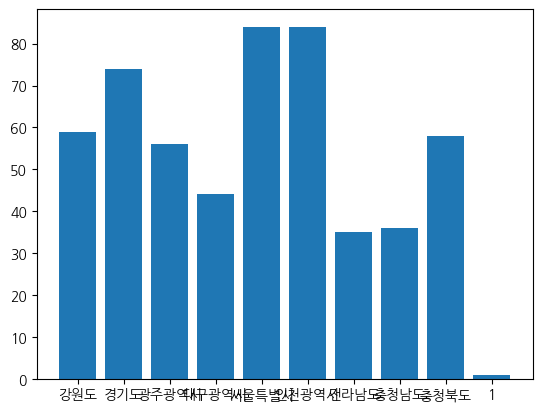

In [458]:
# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
plt.rcParams['font.family']

plt.bar(x=cust_churn['Addr1'].astype(str), height = cust_churn['Age'])
plt.show()

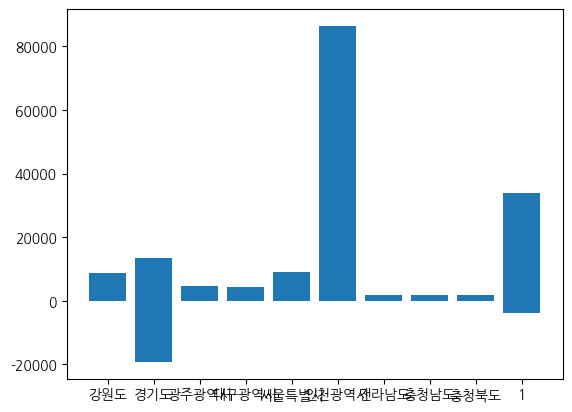

In [459]:
# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
plt.rc('axes', unicode_minus=False)
plt.rcParams['font.family']

plt.bar(x=cust_churn['Addr1'].astype(str), height = cust_churn['Amt'])
plt.show()